<img src="../Images/DSC_Logo.png" style="width: 400px;">

# Time Series Theory in Python - Part 2: Stationary Time Series Models

This notebook introduces stationary time series models, including Moving Average (MA), Autoregressive (AR), Autoregressive Moving Average (ARMA), and Autoregressive Integrated Moving Average (ARIMA) models. 

In [15]:
!pip install statsmodels PythonTsa 

In [16]:
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()

In [17]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # Suppress specific warnings

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from pandas.plotting import lag_plot
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

## 1. Moving Average (MA) Models

In [5]:
from statsmodels.tsa.arima_process import arma_generate_sample

Generating MA(2) Model given by the equation:
<span style="font-size: 24px;">$$ X_t = \varepsilon_t + 0.6 \varepsilon_{t-1} - 0.3 \varepsilon_{t-2} $$</span>


With the Python function `arma_generate_sample`, we can get samples from an autoregressive moving average (ARMA) process defined by specified parameters.

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


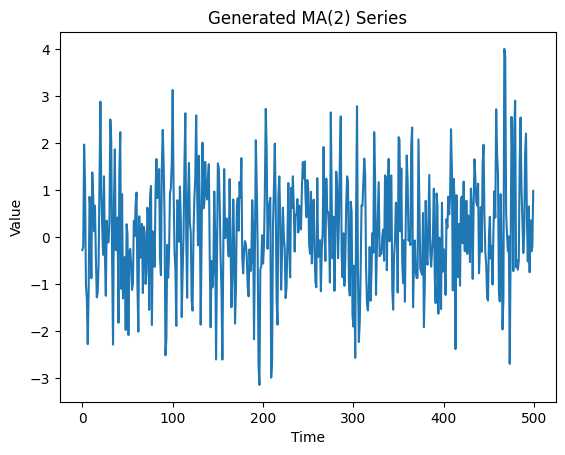

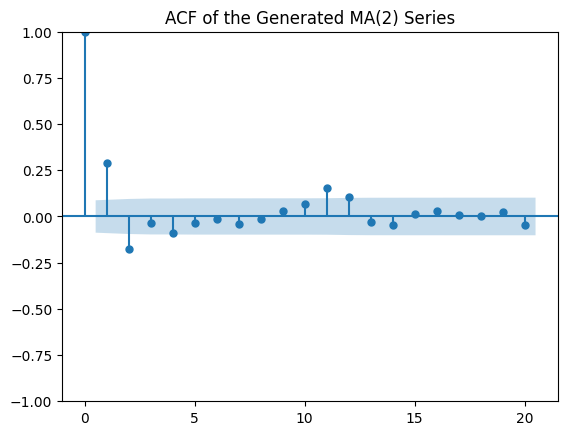

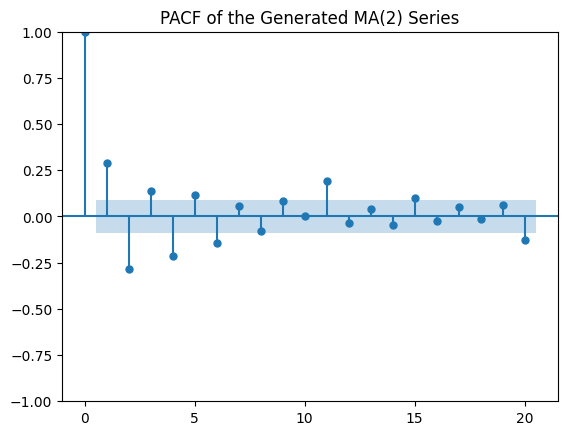

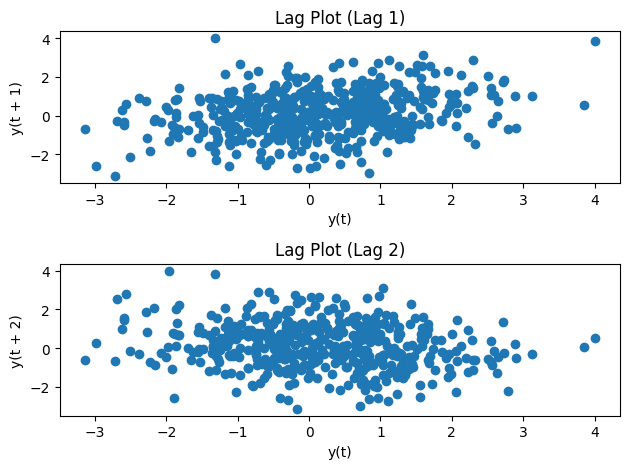

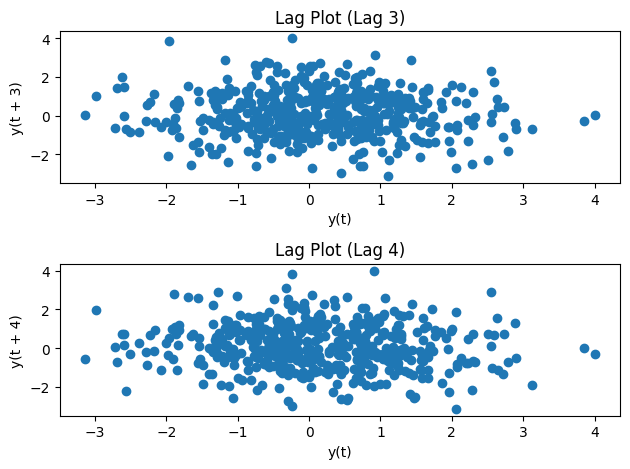

In [6]:
# Define the MA parameters
ma = np.array([1, 0.6, -0.3])  # MA coefficients

# Set the random seed for reproducibility
np.random.seed(123457)

# Generate a sample from the ARMA process
x = arma_generate_sample(ar=[1], ma=ma, nsample=500)  # AR part is set to [1] for no AR component

# Check the type of x (should be a numpy array)
print(type(x))  # Output: <class 'numpy.ndarray'>

# Convert x to a pandas Series
x = pd.Series(x)

# Check the type of x again (now it should be a Series)
print(type(x))  # Output: <class 'pandas.core.series.Series'>

# Plot the time series
x.plot()
plt.title('Generated MA(2) Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Plot ACF and PACF
plot_acf(x, lags=20)
plt.title('ACF of the Generated MA(2) Series')
plt.show()
plot_pacf(x, lags=20)
plt.title('PACF of the Generated MA(2) Series')
plt.show()

# Lag plots for lag 1 and 2
fig = plt.figure()
lag_plot(x, lag=1, ax=fig.add_subplot(211))
plt.title('Lag Plot (Lag 1)')
lag_plot(x, lag=2, ax=fig.add_subplot(212))
plt.title('Lag Plot (Lag 2)')
plt.tight_layout()
plt.show()

# Lag plots for lags 3 and 4
fig = plt.figure()
lag_plot(x, lag=3, ax=fig.add_subplot(211))
plt.title('Lag Plot (Lag 3)')
lag_plot(x, lag=4, ax=fig.add_subplot(212))
plt.title('Lag Plot (Lag 4)')
plt.tight_layout()
plt.show()

## 2. Autoregressive Models

Generating a sample of size (length) 500 from AR(2) Model given by the equation:  
<span style="font-size: 24px;">$$ X_t = 0.8 X_{t-1} - 0.3 X_{t-2} + \varepsilon_t $$</span>  

where  <span style="font-size: 18px;">$ \varepsilon_t \sim \text{iid} \, N(0, 1). $</span>


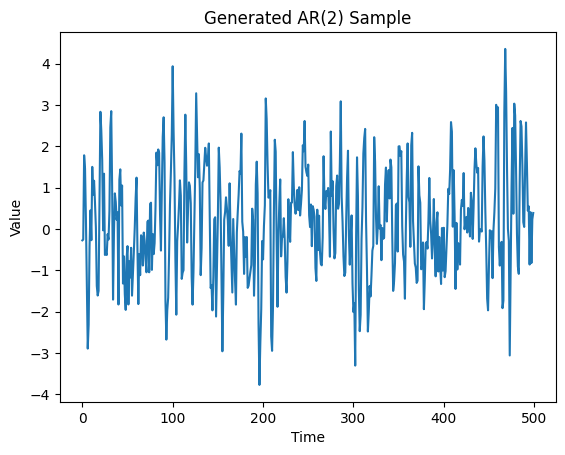

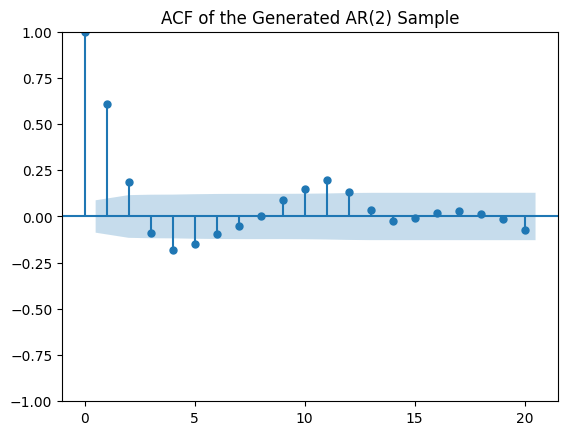

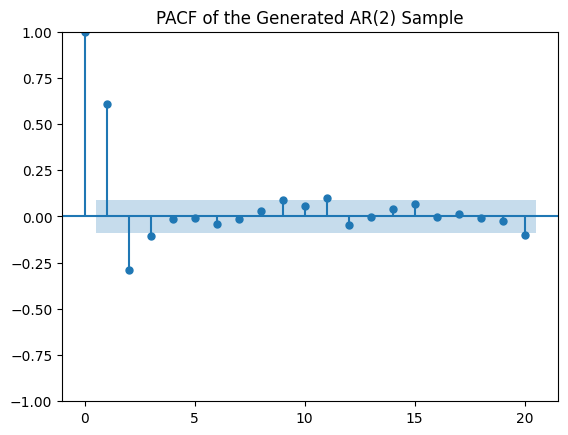

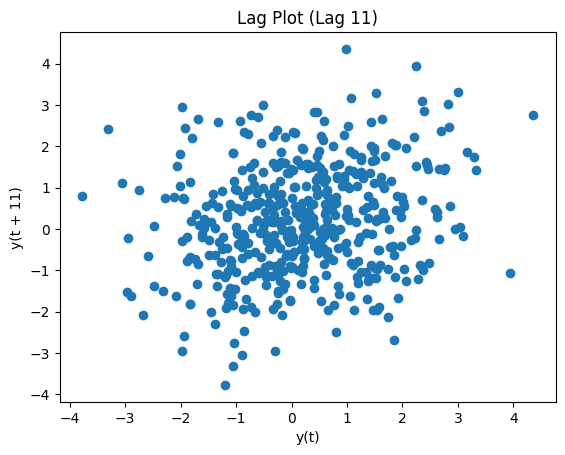

In [7]:
# Define the AR parameters (AR(2) model)
ar = np.array([1, -0.8, 0.3])  # AR coefficients

# Set the random seed for reproducibility
np.random.seed(123457)

# Generate a sample from the AR process
x = arma_generate_sample(ar=ar, ma=[1], nsample=500)  # ma=[1] means no MA part in the model

# Convert the generated sample to a pandas Series
x = pd.Series(x)

# Plot the time series
x.plot()
plt.title('Generated AR(2) Sample')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Plot ACF and PACF
plot_acf(x, lags=20)
plt.title('ACF of the Generated AR(2) Sample')
plt.show()
plot_pacf(x, lags=20)
plt.title('PACF of the Generated AR(2) Sample')
plt.show()

# Lag plot for lag 11
lag_plot(x, lag=11)
plt.title('Lag Plot (Lag 11)')
plt.show()


## 3. Autoregressive Moving Average (ARMA) Models

### **Example 1: Simulating and Building an ARMA(2, 2) Model**

Consider the following ARMA(2,2) model:

<span style="font-size: 18px;">$$
X_t = 0.8 X_{t-1} - 0.6 X_{t-2} + \varepsilon_t + 0.7 \varepsilon_{t-1} + 0.4 \varepsilon_{t-2}
$$</span>

In this model, $ X_t $ is expressed as a linear combination of its previous values and past error terms $( \varepsilon $). We can simulate this ARMA(2,2) model using Python to analyze its properties and behavior.


### Build dataset:

In [8]:
from statsmodels.tsa.arima.model import ARIMA 

Stationarity: True
Invertibility: True


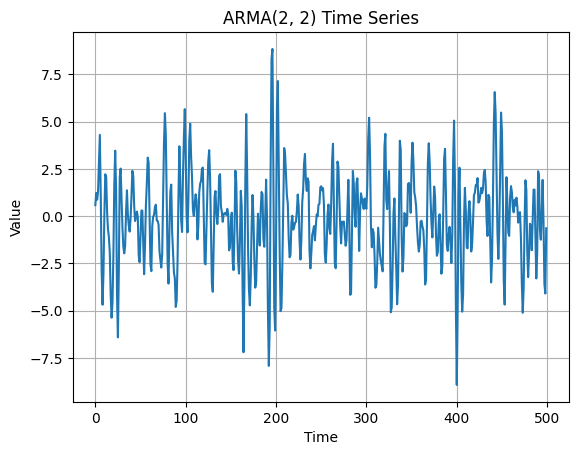

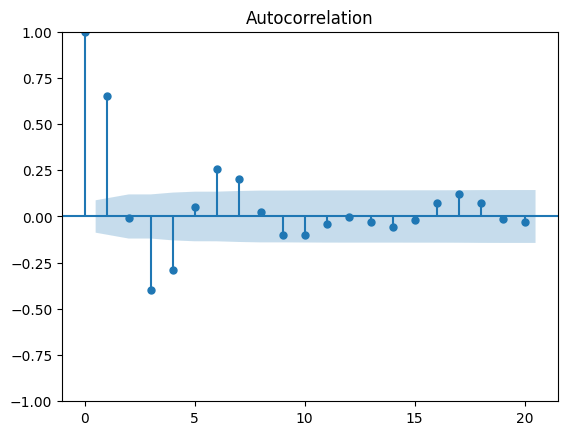

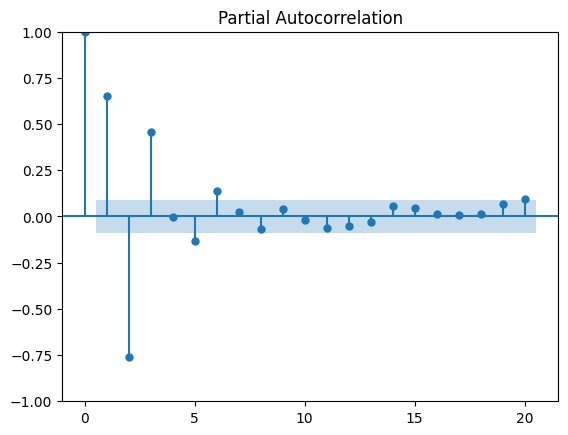

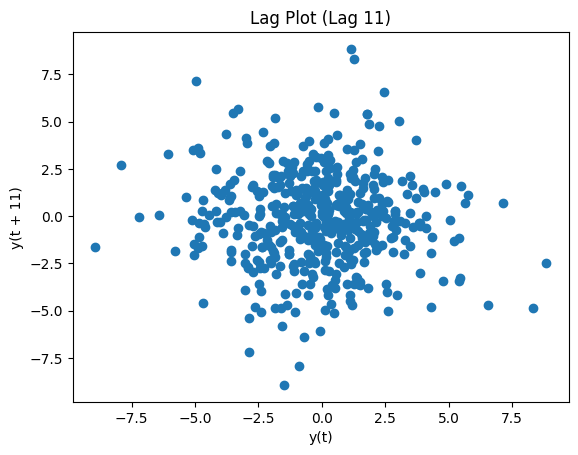

In [9]:
# Set random seed for reproducibility
np.random.seed(12357)

# Define AR and MA parameters for the ARMA model
ar = np.array([1, -0.8, 0.6])  # AR coefficients
ma = np.array([1, 0.7, 0.4])   # MA coefficients

# Create an ARMA process
arma_process = sm.tsa.ArmaProcess(ar, ma)

# Check for stationarity and invertibility
print("Stationarity:", arma_process.isstationary)  # Check if the process is stationary
print("Invertibility:", arma_process.isinvertible)  # Check if the process is invertible

# Generate a sample from the ARMA process
y = arma_generate_sample(ar=ar, ma=ma, nsample=500)
y = pd.Series(y, name='y')  # Convert the generated data to a pandas Series

# Plot the time series
plt.figure()
y.plot(title='ARMA(2, 2) Time Series', xlabel='Time', ylabel='Value')
plt.grid()
plt.show()

# Plot ACF and PACF
plot_acf(y, lags=20)
plt.show()
plot_pacf(y, lags=20)
plt.show()

# Lag plot for lag 11
lag_plot(y, lag=11)
plt.title('Lag Plot (Lag 11)')
plt.show()

### Choose the best model:

Here we perform a comprehensive search for the best ARMA model through an exploration of multiple combinations of orders `p` and `q`.

Note: ARMA modeling is performed using the Python function ARIMA, where the differencing parameter is set to zero (i.e., order=(p, 0, q)). This fits an ARMA(p, q) model to the data.


In [10]:
max_p = 6 # the number could go higher, that means we test more combinations
max_q = 7 # the number could go higher, that means we test more combinations
model_metrics = []

print("Fitting ARMA models...")  # Debug message

for p in range(max_p + 1):
    for q in range(max_q + 1):
        if p == 0 and q == 0:
            continue  # Skip the case where both p and q are zero
        
        try:
            model = ARIMA(y, order=(p, 0, q)).fit()  # Use ARIMA with d=0 for ARMA
            model_metrics.append((p, q, model.aic, model.bic, model.hqic))  # Store p, q, AIC, BIC, HQIC
            print(f"Fitted ARIMA({p}, 0, {q}) with AIC: {model.aic}, BIC: {model.bic}, HQIC: {model.hqic}")  # Print AIC, BIC, HQIC for each fitted model
        except Exception as e:
            print(f"Error fitting ARIMA({p}, 0, {q}): {e}")

# Convert model metrics to DataFrame for easier analysis
metrics_df = pd.DataFrame(model_metrics, columns=['p', 'q', 'AIC', 'BIC', 'HQIC'])

# Print model metrics
print("\nModel Metrics for Different ARMA Models:")
print(metrics_df)

# Get the best model based on the minimum AIC
if not metrics_df.empty:
    best_model = metrics_df.loc[metrics_df['AIC'].idxmin()]
    print("\nBest ARMA Model (p, q, AIC, BIC, HQIC):", best_model)
else:
    print("No models were fitted successfully.")

Fitting ARMA models...
Fitted ARIMA(0, 0, 1) with AIC: 1859.3623778910605, BIC: 1872.006202186327, HQIC: 1864.3237938846648
Fitted ARIMA(0, 0, 2) with AIC: 1619.6683140821474, BIC: 1636.5267464758363, HQIC: 1626.2835354069532
Fitted ARIMA(0, 0, 3) with AIC: 1529.4647374353817, BIC: 1550.5377779274927, HQIC: 1537.733764091389
Fitted ARIMA(0, 0, 4) with AIC: 1531.4411001852932, BIC: 1556.7287487758263, HQIC: 1541.363932172502
Fitted ARIMA(0, 0, 5) with AIC: 1491.3057756263747, BIC: 1520.8080323153301, HQIC: 1502.882412944785
Fitted ARIMA(0, 0, 6) with AIC: 1478.012471186969, BIC: 1511.7293359743464, HQIC: 1491.2429138365806
Fitted ARIMA(0, 0, 7) with AIC: 1479.4808524911764, BIC: 1517.412325376976, HQIC: 1494.3651004719895
Fitted ARIMA(1, 0, 0) with AIC: 2030.9478830591086, BIC: 2043.591707354375, HQIC: 2035.9092990527129
Fitted ARIMA(1, 0, 1) with AIC: 1728.3585632313336, BIC: 1745.2169956250225, HQIC: 1734.9737845561394
Fitted ARIMA(1, 0, 2) with AIC: 1582.5271964726662, BIC: 1603.6002

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(1, 0, 3) with AIC: 1615.4130706367773, BIC: 1640.7007192273104, HQIC: 1625.3359026239862
Fitted ARIMA(1, 0, 4) with AIC: 1510.5492587139252, BIC: 1540.0515154028806, HQIC: 1522.1258960323355
Fitted ARIMA(1, 0, 5) with AIC: 1486.00757646757, BIC: 1519.7244412549476, HQIC: 1499.2380191171817
Fitted ARIMA(1, 0, 6) with AIC: 1479.8486127438996, BIC: 1517.7800856296992, HQIC: 1494.7328607247127
Fitted ARIMA(1, 0, 7) with AIC: 1474.9498437360107, BIC: 1517.0959247202327, HQIC: 1491.4878970480254
Fitted ARIMA(2, 0, 0) with AIC: 1594.040955065589, BIC: 1610.899387459278, HQIC: 1600.6561763903949
Fitted ARIMA(2, 0, 1) with AIC: 1511.5537167316472, BIC: 1532.6267572237582, HQIC: 1519.8227433876546
Fitted ARIMA(2, 0, 2) with AIC: 1456.824489392382, BIC: 1482.112137982915, HQIC: 1466.7473213795909
Fitted ARIMA(2, 0, 3) with AIC: 1457.629314485496, BIC: 1487.1315711744514, HQIC: 1469.2059518039064
Fitted ARIMA(2, 0, 4) with AIC: 1459.5886988013885, BIC: 1493.305563588766, HQIC: 1472.81

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(3, 0, 4) with AIC: 1461.2354641403174, BIC: 1499.166937026117, HQIC: 1476.1197121211305
Fitted ARIMA(3, 0, 5) with AIC: 1461.9120244729734, BIC: 1504.0581054571953, HQIC: 1478.450077784988
Fitted ARIMA(3, 0, 6) with AIC: 1463.796230612164, BIC: 1510.156919694808, HQIC: 1481.9880892553801
Fitted ARIMA(3, 0, 7) with AIC: 1464.7583607442139, BIC: 1515.3336579252802, HQIC: 1484.6040247186315
Fitted ARIMA(4, 0, 0) with AIC: 1477.1142018105647, BIC: 1502.4018504010978, HQIC: 1487.0370337977736
Fitted ARIMA(4, 0, 1) with AIC: 1475.1724363891867, BIC: 1504.6746930781421, HQIC: 1486.749073707597
Fitted ARIMA(4, 0, 2) with AIC: 1459.6748029618088, BIC: 1493.3916677491864, HQIC: 1472.9052456114205
Fitted ARIMA(4, 0, 3) with AIC: 1456.7181079413317, BIC: 1494.6495808271313, HQIC: 1471.6023559221449
Fitted ARIMA(4, 0, 4) with AIC: 1462.4802035886619, BIC: 1504.6262845728838, HQIC: 1479.0182569006765


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(4, 0, 5) with AIC: 1455.9526886315778, BIC: 1502.3133777142218, HQIC: 1474.144547274794


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(4, 0, 6) with AIC: 1465.896439086519, BIC: 1516.4717362675854, HQIC: 1485.7421030609366


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(4, 0, 7) with AIC: 1460.3206722830807, BIC: 1515.1105775625692, HQIC: 1481.8201415886997
Fitted ARIMA(5, 0, 0) with AIC: 1469.4561773448504, BIC: 1498.9584340338058, HQIC: 1481.0328146632608
Fitted ARIMA(5, 0, 1) with AIC: 1467.2799807289316, BIC: 1500.9968455163091, HQIC: 1480.5104233785432
Fitted ARIMA(5, 0, 2) with AIC: 1460.7943481393597, BIC: 1498.7258210251593, HQIC: 1475.6785961201729
Fitted ARIMA(5, 0, 3) with AIC: 1462.2962747750155, BIC: 1504.4423557592374, HQIC: 1478.8343280870301


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(5, 0, 4) with AIC: 1464.2840750790465, BIC: 1510.6447641616905, HQIC: 1482.4759337222627


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(5, 0, 5) with AIC: 1466.1331584612083, BIC: 1516.7084556422747, HQIC: 1485.978822435626


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(5, 0, 6) with AIC: 1463.9483313387436, BIC: 1518.7382366182321, HQIC: 1485.4478006443626


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(5, 0, 7) with AIC: 1469.6727990091044, BIC: 1528.677312387015, HQIC: 1492.826073645925
Fitted ARIMA(6, 0, 0) with AIC: 1462.478065688896, BIC: 1496.1949304762736, HQIC: 1475.7085083385077
Fitted ARIMA(6, 0, 1) with AIC: 1464.144520453821, BIC: 1502.0759933396207, HQIC: 1479.0287684346342
Fitted ARIMA(6, 0, 2) with AIC: 1462.6379306861124, BIC: 1504.7840116703344, HQIC: 1479.175983998127
Fitted ARIMA(6, 0, 3) with AIC: 1464.2910785304196, BIC: 1510.6517676130636, HQIC: 1482.4829371736357


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(6, 0, 4) with AIC: 1466.1199682359118, BIC: 1516.6952654169781, HQIC: 1485.9656322103294


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(6, 0, 5) with AIC: 1467.7277599272427, BIC: 1522.5176652067312, HQIC: 1489.2272292328616


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(6, 0, 6) with AIC: 1462.5679370731573, BIC: 1521.5724504510679, HQIC: 1485.7212117099778


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(6, 0, 7) with AIC: 1466.5577761137943, BIC: 1529.7768975901272, HQIC: 1491.3648560818162

Model Metrics for Different ARMA Models:
    p  q          AIC          BIC         HQIC
0   0  1  1859.362378  1872.006202  1864.323794
1   0  2  1619.668314  1636.526746  1626.283535
2   0  3  1529.464737  1550.537778  1537.733764
3   0  4  1531.441100  1556.728749  1541.363932
4   0  5  1491.305776  1520.808032  1502.882413
5   0  6  1478.012471  1511.729336  1491.242914
6   0  7  1479.480852  1517.412325  1494.365100
7   1  0  2030.947883  2043.591707  2035.909299
8   1  1  1728.358563  1745.216996  1734.973785
9   1  2  1582.527196  1603.600237  1590.796223
10  1  3  1615.413071  1640.700719  1625.335903
11  1  4  1510.549259  1540.051515  1522.125896
12  1  5  1486.007576  1519.724441  1499.238019
13  1  6  1479.848613  1517.780086  1494.732861
14  1  7  1474.949844  1517.095925  1491.487897
15  2  0  1594.040955  1610.899387  1600.656176
16  2  1  1511.553717  1532.626757  1519

In [ ]:
inf=sm.tsa.arma_order_select_ic(y, max_ar=6, max_ma=7, ic=['aic', 'bic', 'hqic'], trend='c') # for statsmodels 0.13.0 and later, trend=’n’

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

In [ ]:
inf.aic_min_order

In [ ]:
inf.bic_min_order

In [ ]:
inf.hqic_min_order

In [ ]:
arma22=ARIMA(y, order=(2,0,2)).fit()

In [ ]:
print(arma22.summary())

### Fit model:

In [ ]:
# Fit the ARMA(2, 2) model
arma22 = ARIMA(y, order=(2, 0, 2), trend='n').fit()

# Analyze the residuals
resid22 = arma22.resid

# Plot ACF and PACF of the residuals
plot_acf(resid22, lags=20)
plt.show()
plot_pacf(resid22, lags=20)
plt.show()

# Perform the Ljung-Box test for residuals
    # Calculate Ljung-Box test statistics and p-values
ljung_box_results = acorr_ljungbox(resid22, lags=26, return_df=True)
    # Create a plot for the p-values
plt.figure()
plt.plot(ljung_box_results['lb_pvalue'], marker='o', linestyle='-', color='b')
plt.axhline(y=0.05, color='r', linestyle='--')  # 5% significance level
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.xticks(np.arange(0, 31, 1))
plt.xticks(ljung_box_results.index)  # Set x-ticks to all lags
plt.gca().set_xticklabels([str(int(x)) if x % 2 == 0 else '' for x in ljung_box_results.index])
plt.grid()
plt.show()

# Perform the normality test on residuals
from scipy import stats 
normaltest_result = stats.normaltest(resid22)
print("Normality test result:", normaltest_result)

### Predict model:

In [ ]:
# Get predictions for the specified range (start=450, end=509)
pred = arma22.get_prediction(start=450, end=509)
predicts = pred.predicted_mean
predconf = pred.conf_int()

# Combine observed data, predictions, and confidence intervals into a DataFrame
predframe = pd.concat([y[450:], predicts, predconf], axis=1)
predframe.columns = ['Observed', 'Predicted', 'Lower CI', 'Upper CI']

# Plot observed, predicted, and confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(predframe['Observed'], label='Observed', color='blue')
plt.plot(predframe['Predicted'], label='Predicted', color='red')
plt.fill_between(predframe.index, predframe['Lower CI'], predframe['Upper CI'], color='gray', alpha=0.5, label='Confidence Interval')
plt.title('ARMA(2, 2) Predictions and Confidence Intervals')
plt.legend()
plt.show()

### **Example 2: The NAO Index Since January 1950**

The time series dataset "nao" in the folder "Ptsadata" is the monthly mean North Atlantic Oscillation (NAO) index since January 1950. The NAO index is important for weather research and is based on the surface sea level pressure difference between the subtropical (Azores) high and the subpolar low.

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


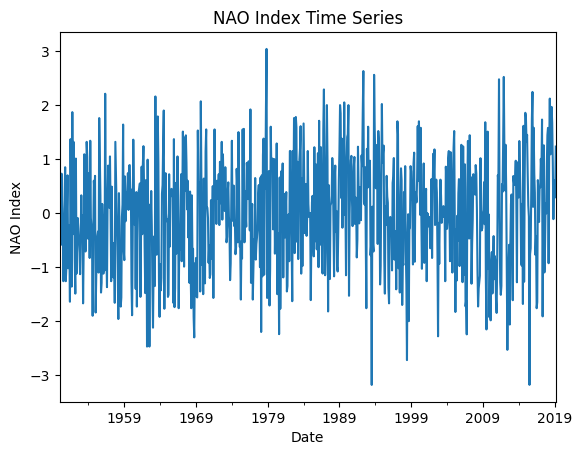

In [19]:
# Load the NAO dataset
nao = pd.read_csv(dtapath + 'nao.csv', header=0)

# Create a time index
timeindex = pd.date_range('1950-01', periods=len(nao), freq='ME')
nao.index = timeindex

# Extract NAO index as a Series
naots = nao['index']  # Ensure 'index' corresponds to the correct column name

# Check the type of the dataframe and series
print(type(nao))    # Should print: <class 'pandas.core.frame.DataFrame'>
print(type(naots))  # Should print: <class 'pandas.core.series.Series'>

# Plot the NAO index time series
naots.plot(title='NAO Index Time Series', xlabel='Date', ylabel='NAO Index')
plt.show()

**Exercise:** Plot ACF and PACF and fit an ARMA(1,0) model to the data.

**Exercise:** Analyze residuals from the ARMA model by receiving the residuals from the fitted model, plotting ACF and PACF, and performing the Ljung-Box test for residuals.

In [30]:
nao.head()
nao

,year,month,index
1950-01-31,1950,1,0.92000
1950-02-28,1950,2,0.40000
1950-03-31,1950,3,-0.36000
1950-04-30,1950,4,0.73000
1950-05-31,1950,5,-0.59000
...,...,...,...
2018-11-30,2018,11,-0.11126
2018-12-31,2018,12,0.61156
2019-01-31,2019,1,0.59202
2019-02-28,2019,2,0.29141


In [22]:
from statsmodels.tsa.arima.model import ARIMA 


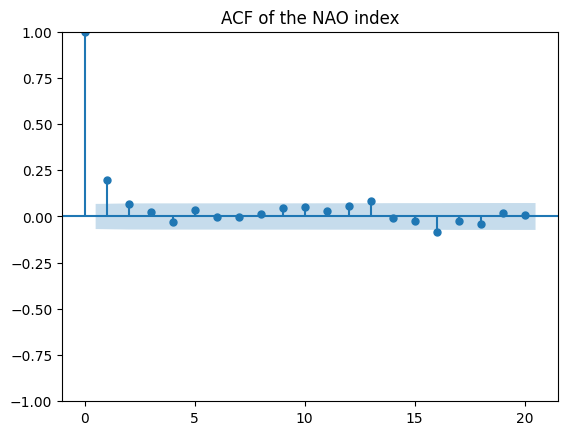

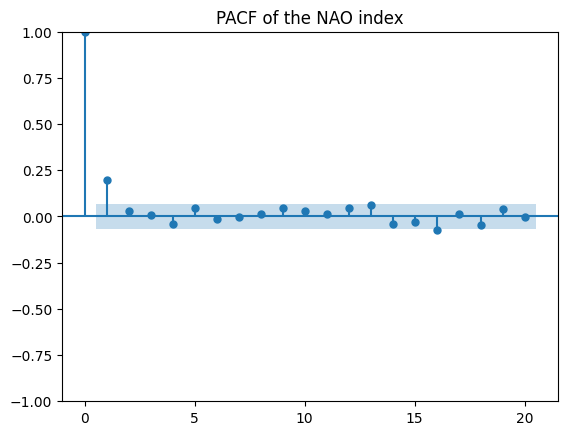

In [23]:
# Plot ACF and PACF
plot_acf(nao['index'], lags=20)
plt.title('ACF of the NAO index')
plt.show()
plot_pacf(nao['index'], lags=20)
plt.title('PACF of the NAO index')
plt.show()

## fit ARMA model

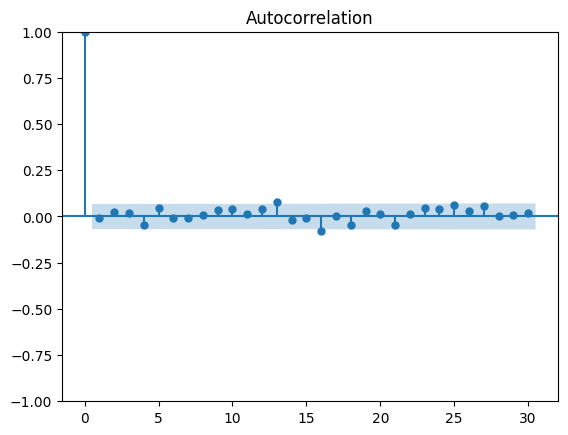

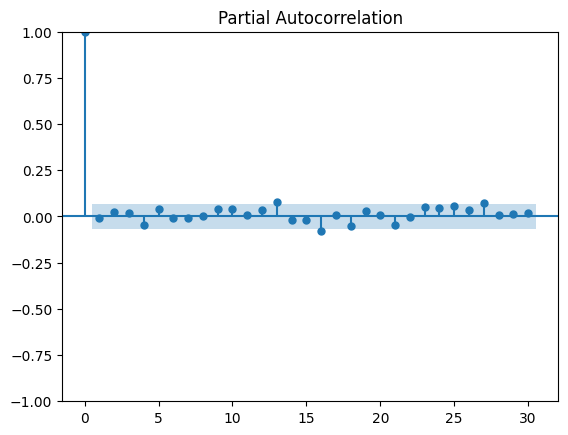

In [33]:
# Fit the ARMA(1, 0) model
arma10 = ARIMA(nao['index'], order=(1, 0, 0), trend='n').fit()

# Analyze the residuals
resid10 = arma10.resid

# Plot ACF and PACF of the residuals
plot_acf(resid10, lags=30) # the number of lags shall be large enough to show the patterns
plt.show()
plot_pacf(resid10, lags=30)
plt.show()

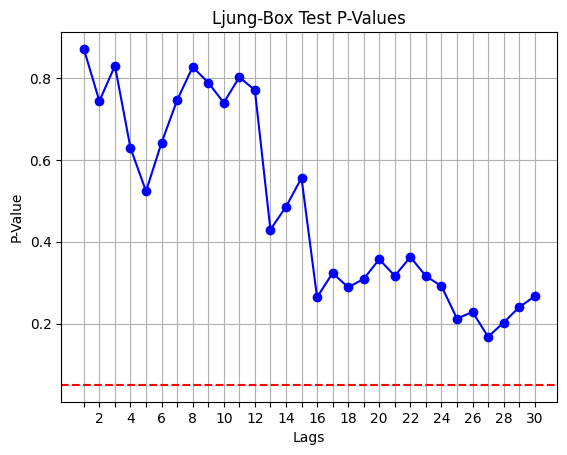

Normality test result: NormaltestResult(statistic=np.float64(7.451360781520834), pvalue=np.float64(0.024096699676173755))


In [34]:
# Perform the Ljung-Box test for residuals
    # Calculate Ljung-Box test statistics and p-values
ljung_box_results = acorr_ljungbox(resid10, lags=30, return_df=True)
    # Create a plot for the p-values
plt.figure()
plt.plot(ljung_box_results['lb_pvalue'], marker='o', linestyle='-', color='b')
plt.axhline(y=0.05, color='r', linestyle='--')  # 5% significance level
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.xticks(np.arange(0, 31, 1))
plt.xticks(ljung_box_results.index)  # Set x-ticks to all lags
plt.gca().set_xticklabels([str(int(x)) if x % 2 == 0 else '' for x in ljung_box_results.index])
plt.grid()
plt.show()

# Perform the normality test on residuals
from scipy import stats 
normaltest_result = stats.normaltest(resid10)
print("Normality test result:", normaltest_result)

**Exercise:** Use the fitted model for predictions from April 2010 to December 2019. Plot the predictions and confidence intervals.

In [35]:
## later

## 4. Differencing, and Stationarity Test

### KPSS Stationary Test

For application of the KPSS test, in the module `statsmodels.tsa.stattools`, there is a test function `kpss` that is the KPSS stationarity test where the argument `regression='c'` means that the function tests the stationarity of a time series without clear trend and obvious seasonality.

In [37]:
from statsmodels.tsa.stattools import kpss

### **Example 2 [continued]: The NAO Index Since January 1950**

In [ ]:
# Perform KPSS test for stationarity
kpss_result = kpss(naots, regression="c", nlags=50)
print(kpss_result)

The p-value 0.096 validates that the NAO Index time series has stationarity. Hence, applying ARMA model was appropriate.

### **Example 3: Southern Hemisphere Temperature Volatility Data Series**

The dataset "Southtemperature" in the folder "Ptsadata" is the monthly temperature volatility series (Jan 1850 – Dec 2007) for the southern hemisphere, which were extracted from the database maintained by the University of East Anglia Climatic Research Unit. This dataset is read from left to right. In order to make it belong to the Series class in pandas, we use the function `pd.concat` to connect every row in it. As it has 158 rows, we use a for loop to complete this connection.

<class 'pandas.core.series.Series'>


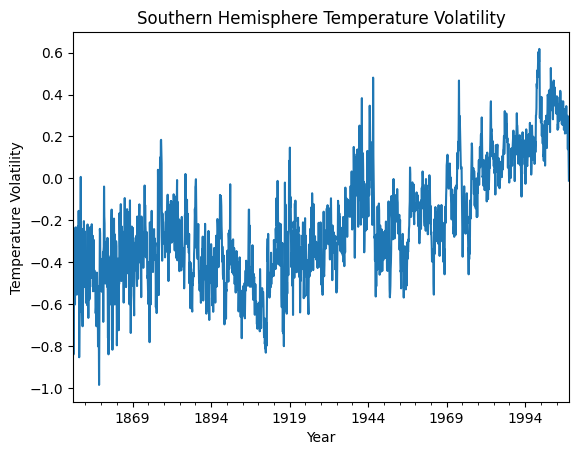

KPSS Statistic: 4.6665118165547055
p-value: 0.01
Lags: 27
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is likely non-stationary.


In [38]:
# Load the temperature data using read_csv
tem = pd.read_csv(dtapath + 'Southtemperature.txt', header=None, sep='\s+')

# Concatenate the first two rows
temts = pd.concat([tem.loc[0], tem.loc[1]], ignore_index=True)

# Use a loop to concatenate the remaining rows
for i in range(2, 158):
    temts = pd.concat([temts, tem.loc[i]], ignore_index=True)

# Check the type of temts (should be pandas Series)
print(type(temts))  # Output: <class 'pandas.core.series.Series'>

# Create a date range starting from 1850 with monthly frequency
dates = pd.date_range('1850', periods=len(temts), freq='ME')
temts.index = dates

# Plot the original time series
temts.plot()
plt.title('Southern Hemisphere Temperature Volatility')
plt.xlabel('Year')
plt.ylabel('Temperature Volatility')
plt.show()

# KPSS test for stationarity
kpss_stat, p_value, lags, crit_values = kpss(temts, regression='c', nlags='auto')

# Output the results of the KPSS test
print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Lags: {lags}')
print('Critical Values:', crit_values)
if p_value < 0.05:
    print("The series is likely non-stationary.")
else:
    print("The series is likely stationary.")

First differencing the time series:

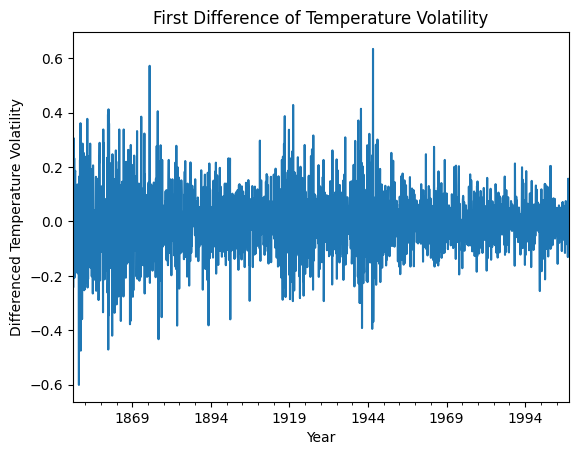

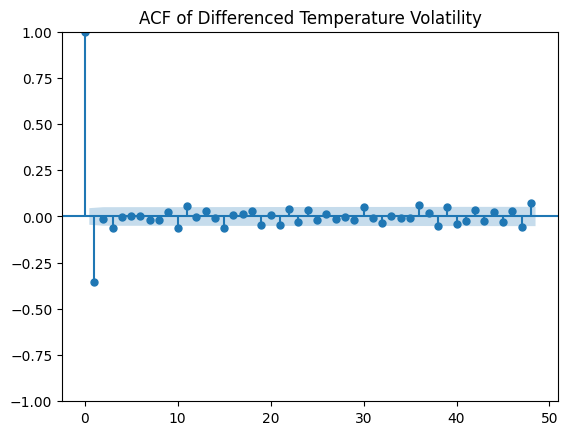

KPSS Statistic: 0.02619117528270722
p-value: 0.1
Lags: 56
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is likely stationary.


In [39]:
dt = temts.diff(1).dropna()

# Plot the differenced series
dt.plot()
plt.title('First Difference of Temperature Volatility')
plt.xlabel('Year')
plt.ylabel('Differenced Temperature Volatility')
plt.show()

# Plot ACF using PythonTsa (PACF is not plotted here)
plot_acf(dt, lags=48)
plt.title('ACF of Differenced Temperature Volatility')
plt.show()

# KPSS test for stationarity
kpss_stat, p_value, lags, crit_values = kpss(dt, regression='c', nlags='auto')

# Output the results of the KPSS test
print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Lags: {lags}')
print('Critical Values:', crit_values)
if p_value < 0.05:
    print("The series is likely non-stationary.")
else:
    print("The series is likely stationary.")

### **Example 4: Chinese Quarterly GDP**

We found that the Chinese Quarterly GDP time series has time series has both trend and seasonality: 

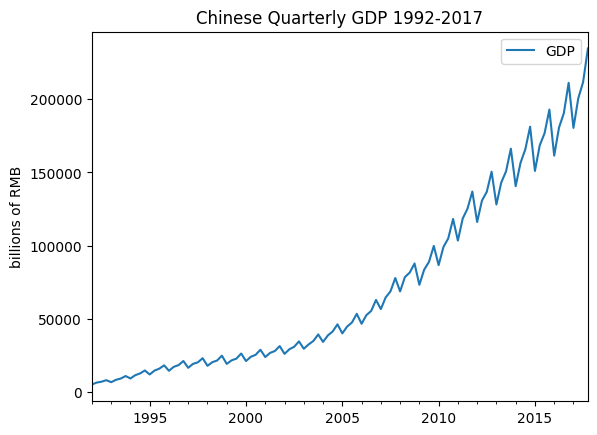

In [40]:
# Load the data
x = pd.read_csv(dtapath + 'gdpquarterlychina1992.1-2017.4.csv',header=0)
dates = pd.date_range(start='1992',periods=len(x),freq='QE')
x.index=dates

# Plot the time series
x.plot()
plt.title('Chinese Quarterly GDP 1992-2017')
plt.ylabel('billions of RMB')
plt.show()

Since it is the quarterly data, the number of seasons is 4 naturally, therefore seasonally difference it with a lag of 4.

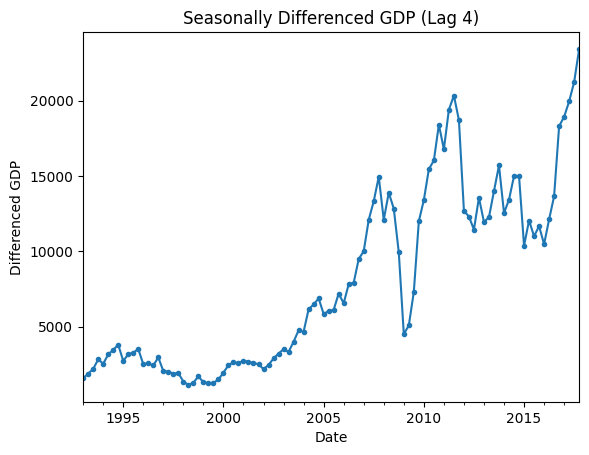

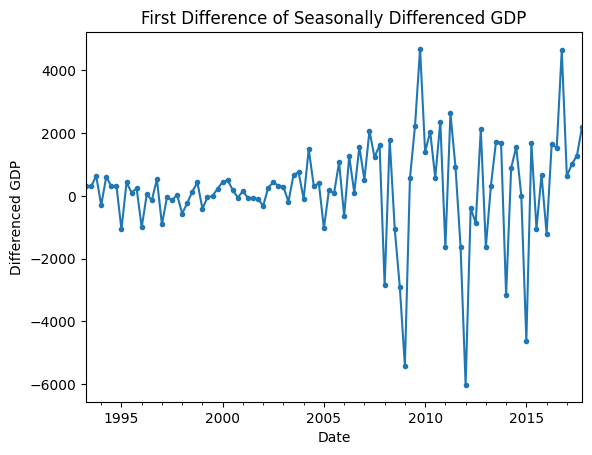

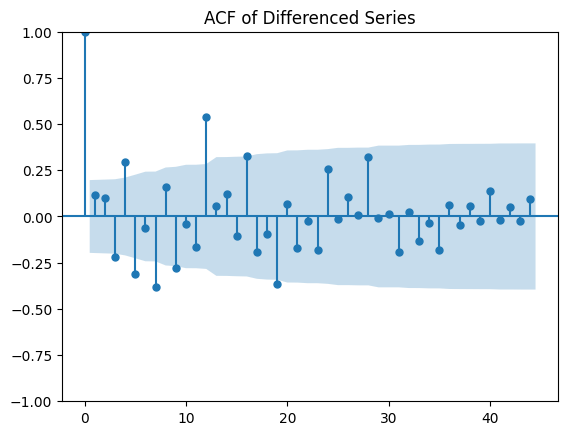

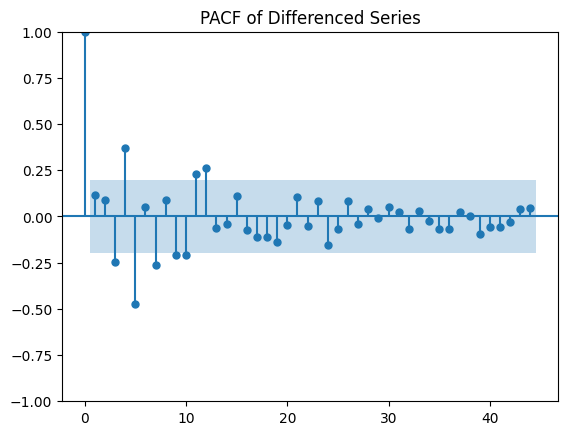

KPSS Statistic: 0.10664288385692093
p-value: 0.1
Lags: 3
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is likely stationary.


In [41]:
# Create a date range starting from 1992 with quarterly frequency
dates = pd.date_range(start='1992', periods=len(x), freq='QE')
x.index = dates

# Create a time series from the 'GDP' column
x = pd.Series(x['GDP'])

# Seasonal differencing with lag 4
dx = x.diff(4).dropna()

# Plot the seasonally differenced series
dx.plot(marker='o', ms=3)  # ms refers to marker size
plt.title('Seasonally Differenced GDP (Lag 4)')
plt.xlabel('Date')
plt.ylabel('Differenced GDP')
plt.show()

# First differencing the seasonally differenced series
d1dx = dx.diff(1).dropna()

# Plot the first difference of the seasonally differenced series
d1dx.plot(marker='o', ms=3)
plt.title('First Difference of Seasonally Differenced GDP')
plt.xlabel('Date')
plt.ylabel('Differenced GDP')
plt.show()

# Plot ACF and PACF for the first difference of seasonally differenced series
plot_acf(d1dx, lags=44)
plt.title('ACF of Differenced Series')
plt.show()
plot_pacf(d1dx, lags=44)
plt.title('PACF of Differenced Series')
plt.show()

# KPSS test for stationarity
kpss_stat, p_value, lags, crit_values = kpss(d1dx, regression='c', nlags='auto')

# Output the results of the KPSS test
print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print(f'Lags: {lags}')
print('Critical Values:', crit_values)
if p_value < 0.05:
    print("The series is likely non-stationary.")
else:
    print("The series is likely stationary.")

## 5. Autoregressive Integrated Moving Average (ARIMA) Models

The key difference is that ARMA is for stationary data, while ARIMA can handle non-stationary data through its differencing component.

### **Example 5: Global Annual Mean Surface Air Temperature Changes Series (1880-1985)**

The time series dataset "Global mean surface air temperature changes 1880–1985" (denoted as GMSATC) from the folder `Ptsadata` is from Hansen and Lebedeff (1987) that investigates the global warming issue. 

### Preprocess:

/tmp/ipykernel_120/3968597292.py:5: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'YE-DEC' instead.
  dates = pd.date_range('1880-12', periods=len(tep), freq='A-DEC')


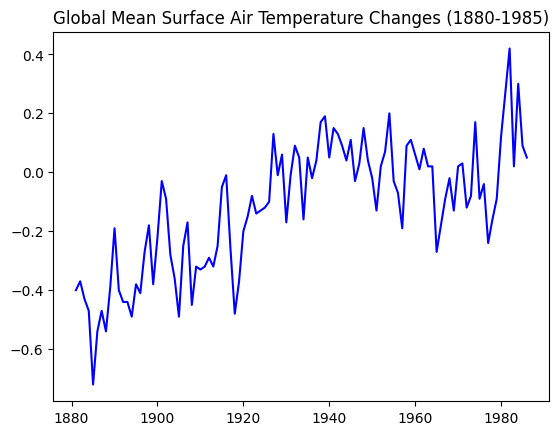

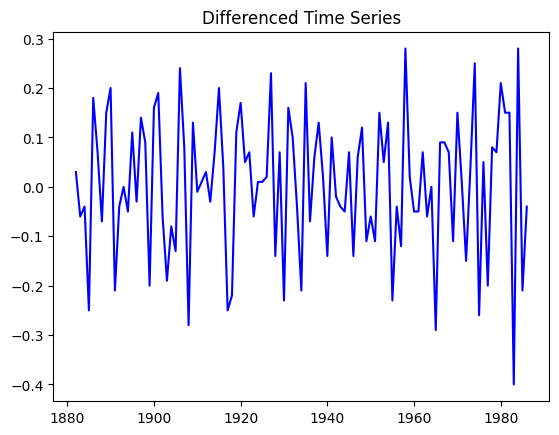

KPSS Test Results: (np.float64(0.08259101825264831), np.float64(0.1), 12, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


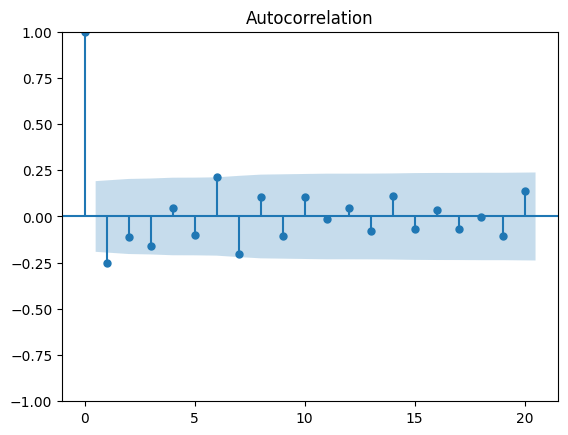

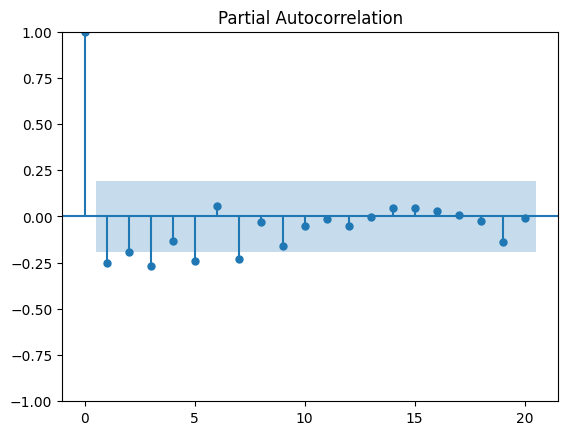

In [42]:
# Load the dataset
tep = pd.read_csv(dtapath + 'Global mean surface air temp changes 1880-1985.csv', header=None)

# Create a date index
dates = pd.date_range('1880-12', periods=len(tep), freq='A-DEC')
tep.index = dates
tepts = pd.Series(tep[0], name='tep')

# Plot the original time series
plt.plot(tepts, color='b')
plt.title('Global Mean Surface Air Temperature Changes (1880-1985)')
plt.show()

# Differencing the time series
dtepts = tepts.diff(1)
dtepts = dtepts.dropna()
dtepts.name = 'dtep'

# Plot the differenced time series
plt.plot(dtepts, color='b')
plt.title('Differenced Time Series')
plt.show()

# KPSS test for stationarity
kpss_test = kpss(dtepts, regression='c', nlags='auto')
print('KPSS Test Results:', kpss_test)

# Plot ACF and PACF
plot_acf(dtepts, lags=20)
plt.show()
plot_pacf(dtepts, lags=20)
plt.show()

### Choose the best model:

In [43]:
def choose_model(x, max_p, max_q, ctrl=1.03):
    best_aic = np.inf
    best_order = None
    best_mdl = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                if p == 0 and q == 0:
                    continue
                # Use ARIMA model instead of ARMA
                model = ARIMA(x, order=(p, 0, q))
                results = model.fit()
                aic = results.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, q)
                    best_mdl = results
            except Exception as e:
                print(f"Model fitting failed for order ({p},{q}) with error: {e}")
                continue

    print(f"Best ARIMA model order: {best_order} with AIC: {best_aic}")
    return best_mdl

# Call the model selection function
best_model = choose_model(dtepts, max_p=7, max_q=7, ctrl=1.03)

# Optionally, display the best model summary
if best_model:
    print(best_model.summary())

KeyboardInterrupt: 

### Fit model:

In [44]:
arma11= ARIMA(dtepts, order=(1,3,0)).fit()
print(arma11.summary())

                               SARIMAX Results                                
Dep. Variable:                   dtep   No. Observations:                  105
Model:                 ARIMA(1, 3, 0)   Log Likelihood                 -64.531
Date:                Tue, 29 Oct 2024   AIC                            133.062
Time:                        10:54:25   BIC                            138.312
Sample:                    12-31-1881   HQIC                           135.188
                         - 12-31-1985                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8046      0.066    -12.112      0.000      -0.935      -0.674
sigma2         0.2054      0.029      6.995      0.000       0.148       0.263
Ljung-Box (L1) (Q):                  18.09   Jarque-

In [ ]:
## it shows skew value between -1 and 1 & kurtosis value between -3 and 3 -> meaning the data shows a normal distribution

In [45]:
# Analyze the residuals
resid11 = arma11.resid
resid11.head(10)

1881-12-31    0.030000
1882-12-31   -0.120000
1883-12-31    0.160000
1884-12-31   -0.340000
1885-12-31    0.596426
1886-12-31   -0.479972
1887-12-31   -0.439463
1888-12-31    0.800361
1889-12-31   -0.216194
1890-12-31   -0.716454
Freq: YE-DEC, dtype: float64

Normality test result: NormaltestResult(statistic=np.float64(3.00554531407305), pvalue=np.float64(0.22251235361843347))


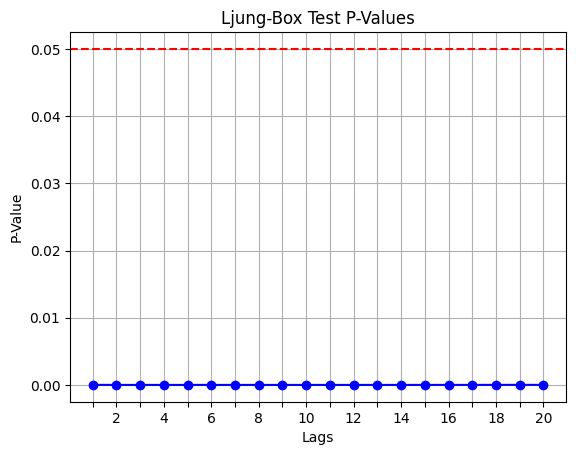

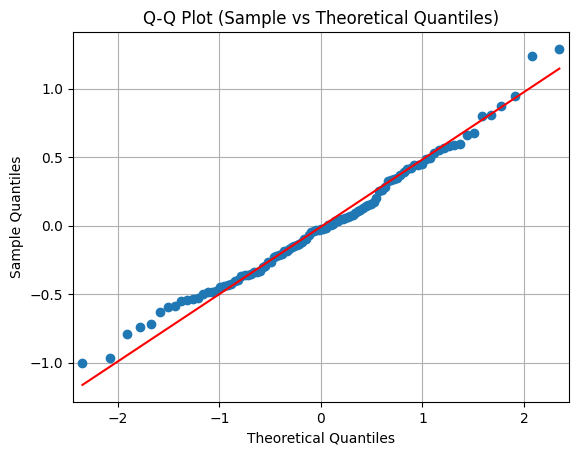

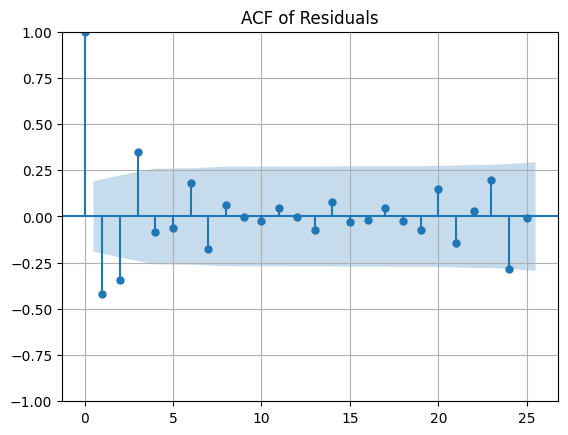

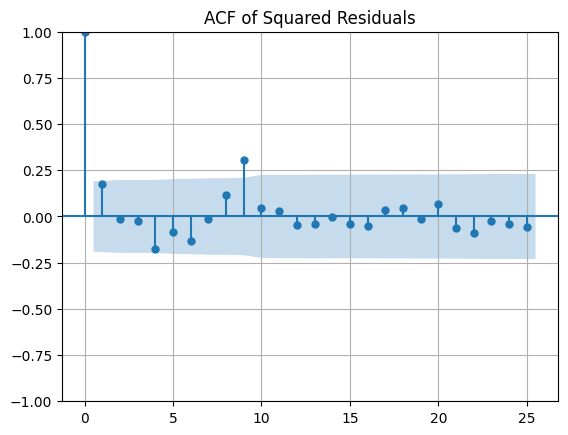

In [46]:
# Perform the normality test on residuals
normaltest_result = stats.normaltest(resid11)
print("Normality test result:", normaltest_result)

# Perform the Ljung-Box test for residuals
    # Calculate Ljung-Box test statistics and p-values
ljung_box_results = acorr_ljungbox(resid11, lags=20, return_df=True)
    # Create a plot for the p-values
plt.figure()
plt.plot(ljung_box_results['lb_pvalue'], marker='o', linestyle='-', color='b')
plt.axhline(y=0.05, color='r', linestyle='--')  # 5% significance level
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.xticks(ljung_box_results.index)  # Set x-ticks to all lags
plt.gca().set_xticklabels([str(int(x)) if x % 2 == 0 else '' for x in ljung_box_results.index])
plt.grid()
plt.show()

# Q-Q plot
plt.figure()
sm.qqplot(resid11, line='q', ax=plt.gca())
plt.title('Q-Q Plot (Sample vs Theoretical Quantiles)')
plt.grid()

# ACF of Residuals
plt.figure()
plot_acf(resid11, lags=25, ax=plt.gca())  # ACF plot for residuals
plt.title('ACF of Residuals')
plt.grid()

# ACF of Squared Residuals
plt.figure()
plot_acf(np.square(resid11), lags=25, ax=plt.gca())  # ACF plot for squared residuals
plt.title('ACF of Squared Residuals')
plt.grid()

### Predict model:

In [ ]:
# Generate prediction results
pred = arma11.get_prediction(start='1960-12', end='1990-12')

# Extract predicted mean and confidence intervals
predicts = pred.predicted_mean
predconf = pred.conf_int()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(dtepts, label='Observed', color='blue')
predicts.plot(label='Forecast', color='red')
plt.fill_between(predicts.index,
                 predconf.iloc[:, 0],
                 predconf.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.title('ARIMA Forecast (1960-1990)')
plt.xlabel('Year')
plt.ylabel('Differenced Temperature')
plt.legend()
plt.show()